In [1]:
import xarray as xr
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

dirpath = '/local/data/soccom/SOCCOM_LoResQC_LIAR_05May2021_netcdf/'
float_names = ['5904183', '5095637', '5094858', '5094860', '5094180', '5094184', '5095372', '5094768', '5094767']

f_4183 = xr.open_dataset(dirpath + '5904183QC.nc')
f_5637 = xr.open_dataset(dirpath + '5905637QC.nc')
f_4858 = xr.open_dataset(dirpath + '5904858QC.nc')
f_4860 = xr.open_dataset(dirpath + '5904860QC.nc')
f_4180 = xr.open_dataset(dirpath + '5904180QC.nc')
f_4184 = xr.open_dataset(dirpath + '5904184QC.nc')
f_5372 = xr.open_dataset(dirpath + '5905372QC.nc')
f_4768 = xr.open_dataset(dirpath + '5904768QC.nc')
f_4767 = xr.open_dataset(dirpath + '5904767QC.nc')

floats = [f_4183, f_5637, f_4858, f_4860, f_4180, f_4184, f_5372, f_4768, f_4767]
data = f_4183
#data = xr.open_dataset('/local/data/soccom/SOCCOM_LoResQC_LIAR_22Dec2020_netcdf/7614SOOCNQC.nc')
data

<xarray.Dataset>
Dimensions:              (NPARAMETER: 36, N_LEVELS: 67, N_PROF: 233)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/51)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 05/05/2...

<Figure size 5760x720 with 0 Axes>

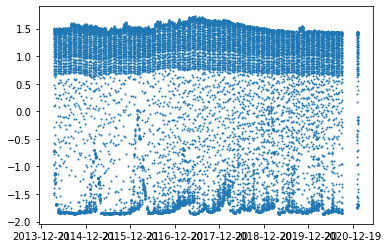

<Figure size 5760x720 with 0 Axes>

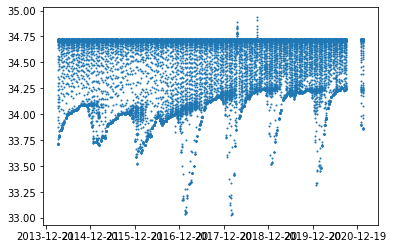

<Figure size 5760x720 with 0 Axes>

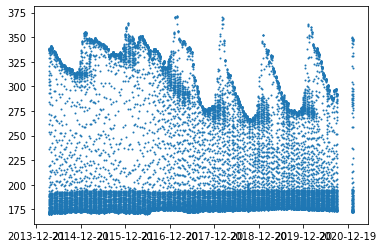

<Figure size 5760x720 with 0 Axes>

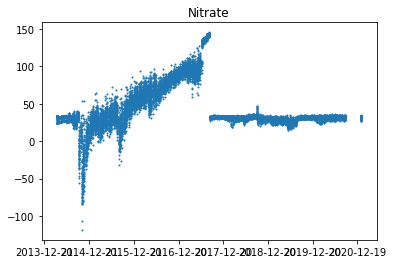

<Figure size 5760x720 with 0 Axes>

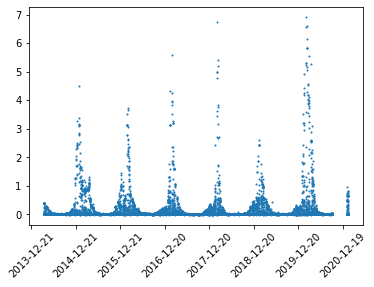

<Figure size 5760x720 with 0 Axes>

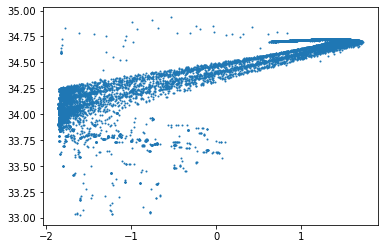

In [2]:
temp = data.Temperature.transpose().values
time = data.JULD.transpose().values

dim = temp.shape
import numpy.matlib

timerep = np.matlib.repmat(time,dim[0],1);

temp=temp.reshape((dim[0]*dim[1], 1), order='F')
time = timerep.reshape((dim[0]*dim[1], 1), order='F')
nanmask=np.isnan(temp)

plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, temp, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()


sal = data.Salinity.transpose().values
sal=sal.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, sal, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

o2 = data.Oxygen.transpose().values
o2=o2.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, o2, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

nitrate = data.Nitrate.transpose().values
nitrate=nitrate.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, nitrate, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Nitrate')
plt.show()

chl = data.Chl_a.transpose().values
chl=chl.reshape((dim[0]*dim[1], 1), order='F')
plt.figure(figsize=(80,10))
tick_spacing = 365
fig, ax = plt.subplots(1,1)
ax.scatter(time, chl, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(80,10))
tick_spacing = 1
fig, ax = plt.subplots(1,1)
ax.scatter(temp, sal, s=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

In [3]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [4]:
#depth = data.Depth.transpose().values
#depth=depth.reshape((dim[0]*dim[1], 1), order='F')
#plt.figure(figsize=(80,10))
#tick_spacing = 365
#fig, ax = plt.subplots(1,1)
#ax.scatter(time, depth, s=1)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plt.show()

In [5]:
x = data.JULD
y = data.Depth.values
y = np.nanmean(y, axis=0)

In [6]:
temperature = data.Temperature.transpose().values
temp_qf = data.Temperature_QFA.transpose().values
temp_qf = temp_qf == 0
temperature[~temp_qf] = np.nan

Text(0.5, 0.98, 'Float 5904767')

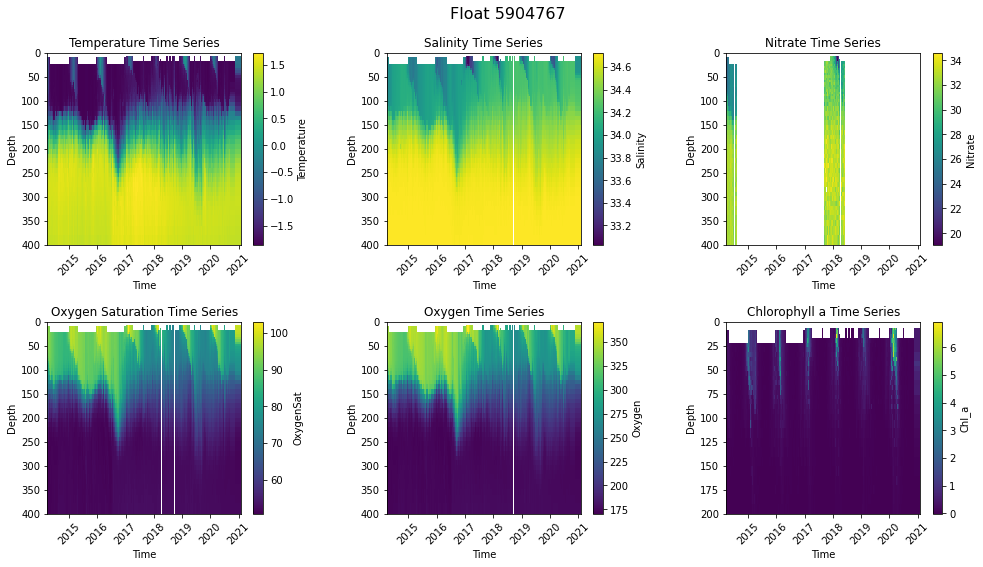

In [7]:
plt.figure(figsize=(16, 8)) 
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(2, 3, 1)
plt.title('Temperature Time Series')
plt.pcolormesh(x.values, y, temperature, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Temperature')
plt.xticks(rotation = 45)

#make into function
#def plot_depth_time: 
salinity = data.Salinity.transpose().values
sal_qf = data.Salinity_QFA.transpose().values

sal_qf = sal_qf == 0
salinity[~sal_qf] = np.nan


plt.subplot(2, 3, 2)
plt.title('Salinity Time Series')
plt.pcolormesh(x.values, y, salinity, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Salinity')
plt.xticks(rotation = 45)

nitrate = data.Nitrate.transpose().values
nitr_qf = data.Nitrate_QFA.transpose().values
nitr_qf = nitr_qf == 0
nitrate[~nitr_qf] = np.nan

plt.subplot(2, 3, 3)
plt.title('Nitrate Time Series')
plt.pcolormesh(x.values, y, nitrate, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Nitrate')
plt.xticks(rotation = 45)

oxygen_s = data.OxygenSat.transpose().values
oxygen_s_qf = data.OxygenSat_QFA.transpose().values
oxygen_s_qf = oxygen_s_qf == 0
oxygen_s[~oxygen_s_qf] = np.nan

plt.subplot(2, 3, 4)
plt.title('Oxygen Saturation Time Series')
plt.pcolormesh(x.values, y, oxygen_s, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('OxygenSat')
plt.xticks(rotation = 45)

oxygen = data.Oxygen.transpose().values
oxygen_qf = data.Oxygen_QFA.transpose().values
oxygen_qf = oxygen_qf == 0
oxygen[~oxygen_qf] = np.nan

plt.subplot(2, 3, 5)
plt.title('Oxygen Time Series')
plt.pcolormesh(x.values, y, oxygen, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Oxygen')
plt.xticks(rotation = 45)

chl_a = data.Chl_a_corr.transpose().values
chl_a_qf = data.Chl_a_corr_QFA.transpose().values
chl_a_qf = chl_a_qf == 0
chl_a[~chl_a_qf] = np.nan

plt.subplot(2, 3, 6)
plt.title('Chlorophyll a Time Series')
plt.pcolormesh(x.values, y,  data.Chl_a.transpose().values, shading = 'auto')
plt.ylim([0, 200])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Chl_a')
plt.xticks(rotation = 45)

plt.suptitle('Float 5904767', fontsize=16)
#plt.savefig('/home/ac63/projects/hmei/figures/5904767_Time_Series.png')


In [8]:
import cartopy.crs as ccrs
import cartopy
import pandas as pd
lat = data.Lat.values
lon = data.Lon.values

minlon = min(lon)
maxlon = max(lon)

dates = x.values
dates = pd.to_datetime(dates).year

yrs = range(min(dates), max(dates))

Text(0.5, 1.0, 'Float 5904767 Trajectory')

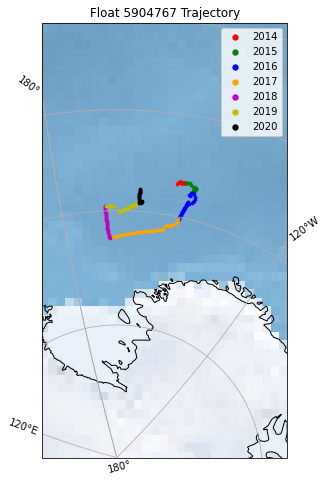

In [9]:
clrs=['r','g','b','orange','m','y','k', 'pink'];

plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
ax.stock_img()
ax.coastlines()
for i in range(len(yrs)):
    ax.scatter(lon[dates==yrs[i]], lat[dates==yrs[i]], s=7, color = clrs[i], transform=ccrs.PlateCarree(), label=str(yrs[i]))
ax.set_extent([minlon - 10, maxlon + 10, -90, -50])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
#.set_xticks(ax.get_xticks())
#ax.set_yticks(ax.get_yticks())
gridlines = ax.gridlines(draw_labels=True)
plt.legend(markerscale=2)
plt.title('Float 5904767 Trajectory')
#plt.savefig('/home/ac63/projects/hmei/figures/5904767_Trajectory.png')


Text(0.5, 1.0, 'Float Trajectories')

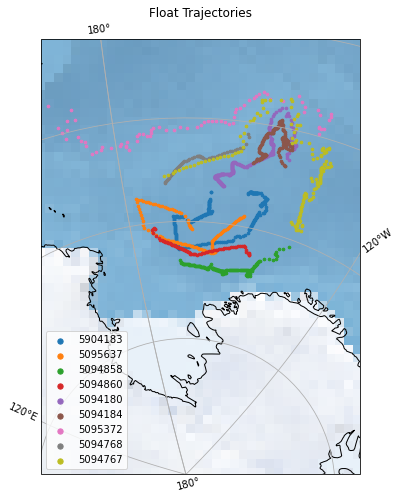

In [10]:
#plotting all float trajectories

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
ax.stock_img()
ax.coastlines()

ax.set_extent([170, 225, -90, -50])
ax.set_xlabel('lon')
ax.set_ylabel('lat')
for f in range(len(floats)):
    lat = floats[f].Lat.values
    lon = floats[f].Lon.values
    ax.scatter(lon, lat, transform=ccrs.PlateCarree(), s=7, label=float_names[f])
gridlines = ax.gridlines(draw_labels=True)
plt.legend(markerscale=2)

plt.title('Float Trajectories')
#plt.savefig('/home/ac63/projects/hmei/figures/Float_Trajectories.png')

<ipython-input-11-3c911b41798b>:42: RuntimeWarning: Mean of empty slice
  dpth_mid=np.nanmean(depth_cat, axis=2)


Text(0.5, 1.0, '5904183 Mixed Layer Depth Temperature Time Series')

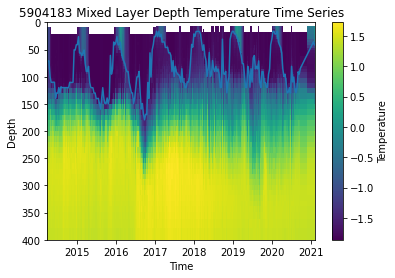

In [11]:
density = data.Sigma_theta.transpose().values
density = np.flip(density, 0)
#density=density.reshape(1,(dim[0]*dim[1]), order='F')
depth = data.Depth.transpose().values
depth = np.flip(depth, 0)
#depth=depth.reshape(1,(dim[0]*dim[1]), order='F')

def get_mld_rho():
    rhocrit = 0.02
    density[np.isnan(depth)] = float("nan")
    depth[np.isnan(density)] = float("nan")
    d10 = np.absolute(depth-10)
    dref = np.empty((1, np.size(density, 1)))
    dref[:] = np.NaN
    mld = np.empty((1,np.size(density, 1)))
    mld[:] = np.NaN
    imld = np.empty((1,np.size(density, 1))) 
    imld[:] = np.NaN
    for ii in range(np.size(density,1)):
        idx = (d10[:, ii]==np.nanmin(d10[:,ii], axis=0)).argmax()
        dref[0,ii]=depth[idx,ii]
        if (idx.size != 0):
            drho10 = density[idx, ii]
            drho10 = np.absolute(density[:,ii] - drho10);
            drho10[0:idx] = np.NaN;
            idx = (drho10>=rhocrit).argmax()
            if (idx.size == 0):
                imld[0, ii] = np.NaN
                mld[0, ii] = np.Nan
            else:
                imld[0,ii]=idx;
                mld[0,ii]=depth[idx,ii]
        else:
            imld[0, ii] = np.NaN
            mld[0, ii] = np.Nan
    imld[mld>900]=np.NaN;
    mld[mld>900]=np.NaN;
    imld = imld.flatten()
    mld = mld.flatten()
    end = len(depth)
    depth_cat = np.stack((depth[0:end-1,:],depth[1:end,:]),axis=2);
    dpth_mid=np.nanmean(depth_cat, axis=2)
    depth2 = np.vstack((depth[0,:],dpth_mid,depth[end-1,:]))
    thickn=np.diff(depth2,axis=0);

    return mld, imld, thickn

mld, imld, thickn = get_mld_rho()

#dpth_mid=nanmean(cat(3,dpth(1:end-1,:),dpth(2:end,:)),3);
#thickn=diff([dpth(1,:);dpth_mid;dpth(end,:)],[],1);
plt.pcolormesh(x.values, y, temperature, shading = 'auto')
plt.ylim([0, 400])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth')
cbar.set_label('Temperature')
plt.plot(x.values, mld)
plt.title('5904183 Mixed Layer Depth Temperature Time Series')
#plt.savefig('/home/ac63/projects/hmei/figures/5904183_MLD')


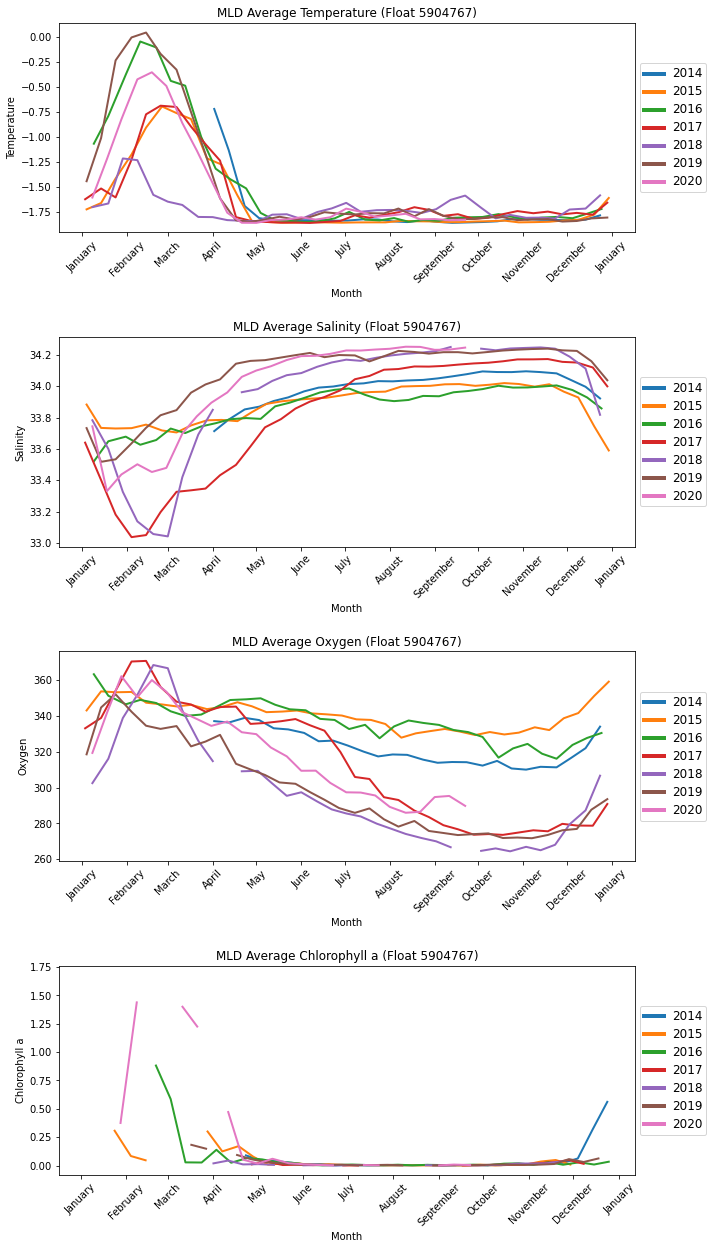

In [12]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#date_mo = np.datetime_as_string(x.values, unit = 'D')
temp = temperature

variables = [temp, salinity, oxygen, chl_a]
varNames = ['Temperature', 'Salinity', 'Oxygen', 'Chlorophyll a']
def plot_avg_var(variables, varNames):
    fig = plt.figure(figsize=(10, 20))
    for ii in range(0, len(variables)):
        var = np.flip(variables[ii], 0)
        avg_var = np.empty((1,np.size(var, 1))).flatten()
        for i in range(len(imld)):
            #avg_temp[i] = np.nanmean(temp[0:int(imld[i]),i])
            avg_var[i] = np.nansum(var[0:int(imld[i]),i]*thickn[0:int(imld[i]),i])/np.nansum(thickn[0:int(imld[i]),i])
        avg_var[avg_var==0] = np.nan
        
        dayofyear = data.JULD.dt.dayofyear
        
        ax = fig.add_subplot(4,1,ii + 1)
        for yr in range(len(yrs)):
            plt.plot(dayofyear.values[dates==yrs[yr]], avg_var[dates==yrs[yr]], label = str(yrs[yr]), linewidth=2)

        date_form = DateFormatter("%B") # %m for month number
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        ax.set_xlabel('Month')
        ax.set_ylabel(str(varNames[ii]))
        plt.title('MLD Average ' + str(varNames[ii]) + ' (Float 5904767)')
        plt.setp(leg_lines, linewidth=4)
        plt.setp(leg_texts, fontsize='large')
        plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
        #plt.gcf().autofmt_xdate()
        #plt.show()
        #print(avg_var)
plot_avg_var(variables, varNames)    
#plt.savefig('/home/ac63/projects/hmei/figures/5904767_MLD_Average_Vars')
